# PETOOL wrapper for Python 3

## Installation

1. PETOOL Wrapper needs MATLAB Engine API for Python. See https://www.mathworks.com/help/matlab/matlab-engine-for-python.html for installation instructions.
2. Download PETOOL sources from http://www.sciencedirect.com/science/article/pii/S0010465511002669.
3. Add PETOOL sources to MATLABPATH environment variable. You can do it by running the following commands in matlab console  
    `addpath('path_to_petool')`  
    `savepath`

## Usage

In [1]:
%matplotlib inline
import os
os.chdir('../')
from rwp.antennas import *
from rwp.petool import *
from rwp.vis import *

Create new environment

In [2]:
environment = Troposphere()
environment.ground_material = WetGround()
environment.z_max = 300
max_range = 50000

Create new antenna

In [3]:
antenna = GaussAntenna(wavelength=0.1, height=30, beam_width=2, eval_angle=0, polarz='H')

Create new propagation task

In [4]:
petool_task = PETOOLPropagationTask(antenna=antenna, env=environment, two_way=False, max_range_m=max_range, dx_wl=400, n_dx_out=1,
                                    dz_wl=3)

Start field calculation

In [5]:
petool_field = petool_task.calculate()

Visualize the result

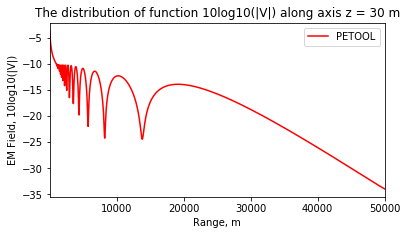

In [6]:
petool_vis = FieldVisualiser(petool_field, trans_func=lambda x: x, label='PETOOL')
plt = petool_vis.plot_hor(30)
plt.xlabel('Range, m')
plt.ylabel('EM Field, 10log10(|V|)')
plt.title('The distribution of function 10log10(|V|) along axis z = 30 m')
plt.show()

Text(0.5, 1.0, 'The intensity of the field component 10log10|V|')

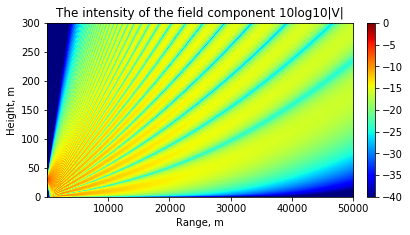

In [7]:
plt = petool_vis.plot2d(min=-40, max=0)
plt.xlabel('Range, m')
plt.ylabel('Height, m')
plt.title('The intensity of the field component 10log10|V|')